# **Project: Assessing the Impact of COVID-19 on U.S. Airline Industries**

## This notebook mainly focuses on Data Cleaning and Data Explorations

# **0. Load Dependencies**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("airline_delay.csv")

data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,0.80,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,5.12,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.00,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.00,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0


# **1. Quick EDA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [5]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,3351.000000,3351.0,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.00000,3343.000000,3343.000000
mean,2019.459266,12.0,298.271014,50.995214,16.065337,1.443144,16.183383,0.137320,17.166069,2.884535,0.575830,3333.868083,1144.763087,177.591385,749.57942,5.400838,1256.533353
std,0.498412,0.0,852.436335,146.484456,41.759516,4.821657,56.423008,0.646479,55.447043,10.126658,2.097884,10284.926623,3371.103512,734.343542,3190.50916,27.161402,4184.451426
min,2019.000000,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2019.000000,12.0,35.000000,5.000000,1.490000,0.000000,0.820000,0.000000,0.900000,0.000000,0.000000,230.000000,68.500000,0.000000,21.50000,0.000000,31.000000
50%,2019.000000,12.0,83.000000,12.000000,4.750000,0.060000,2.980000,0.000000,3.280000,0.000000,0.000000,746.000000,272.000000,3.000000,106.00000,0.000000,205.000000
75%,2020.000000,12.0,194.500000,33.000000,12.255000,1.010000,8.870000,0.000000,10.240000,2.000000,0.000000,2095.500000,830.500000,82.000000,362.00000,0.000000,724.000000
max,2020.000000,12.0,19713.000000,2289.000000,697.000000,89.420000,1039.540000,17.310000,819.660000,224.000000,42.000000,160383.000000,55215.000000,14219.000000,82064.00000,553.000000,75179.000000


In [6]:
# check missing values

data[data.isna().any(axis=1)]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
341,2020,12,DL,Delta Air Lines Inc.,BIL,"Billings, MT: Billings Logan International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2020,12,DL,Delta Air Lines Inc.,CHA,"Chattanooga, TN: Lovell Field",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,2020,12,DL,Delta Air Lines Inc.,FAI,"Fairbanks, AK: Fairbanks International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,2020,12,OO,SkyWest Airlines Inc.,BDL,"Hartford, CT: Bradley International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1147,2020,12,OO,SkyWest Airlines Inc.,PWM,"Portland, ME: Portland International Jetport",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1264,2020,12,UA,United Air Lines Inc.,PNS,"Pensacola, FL: Pensacola International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,2020,12,UA,United Air Lines Inc.,STL,"St. Louis, MO: St Louis Lambert International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,2019,12,OO,SkyWest Airlines Inc.,MLB,"Melbourne, FL: Melbourne International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# remove missing values

df = data.dropna()

df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,0.80,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,5.12,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.00,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.00,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3343 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3343 non-null   int64  
 1   month                3343 non-null   int64  
 2   carrier              3343 non-null   object 
 3   carrier_name         3343 non-null   object 
 4   airport              3343 non-null   object 
 5   airport_name         3343 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   float6

In [9]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [10]:
for i in range(len(df.columns)):
    print(df[df.columns[i]].value_counts())
    print("-"*10)

year
2019    1811
2020    1532
Name: count, dtype: int64
----------
month
12    3343
Name: count, dtype: int64
----------
carrier
OO    479
MQ    285
DL    252
G4    240
9E    226
YV    219
AA    199
YX    196
UA    191
OH    187
F9    184
WN    181
AS    144
B6    120
EV    106
NK     97
HA     37
Name: count, dtype: int64
----------
carrier_name
SkyWest Airlines Inc.      479
Envoy Air                  285
Delta Air Lines Inc.       252
Allegiant Air              240
Endeavor Air Inc.          226
Mesa Airlines Inc.         219
American Airlines Inc.     199
Republic Airline           196
United Air Lines Inc.      191
PSA Airlines Inc.          187
Frontier Airlines Inc.     184
Southwest Airlines Co.     181
Alaska Airlines Inc.       144
JetBlue Airways            120
ExpressJet Airlines LLC    106
Spirit Air Lines            97
Hawaiian Airlines Inc.      37
Name: count, dtype: int64
----------
airport
BNA    31
PIT    31
MSY    30
RDU    30
DTW    29
       ..
DEC     1
DDC     

### Observation 1:

- only year 2019 and 2020,
- only month Dec
- explore the influence of Covid-19 on the US airline Industry ?
- Christmas season

In [24]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [28]:
# check security_ct: Number of flights canceled due to a security breach?

df['sum_delay_reasons'] = (df['carrier_ct'] + df['weather_ct'] + df['nas_ct'] + df['security_ct'] + df['late_aircraft_ct']).round(0)

df[~df['arr_del15'].isin(df['sum_delay_reasons'])]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delay_reasons


so, security_ct is the number of flights delayed due to a security breach, not cancelled

In [11]:
df.to_csv("airline_delay_cleaned.csv")

# **2. In-depth EDA**

## 2.1 Histogram - Distributions

In [12]:
col_numeric = df.select_dtypes(include='number').columns
len(col_numeric)

17

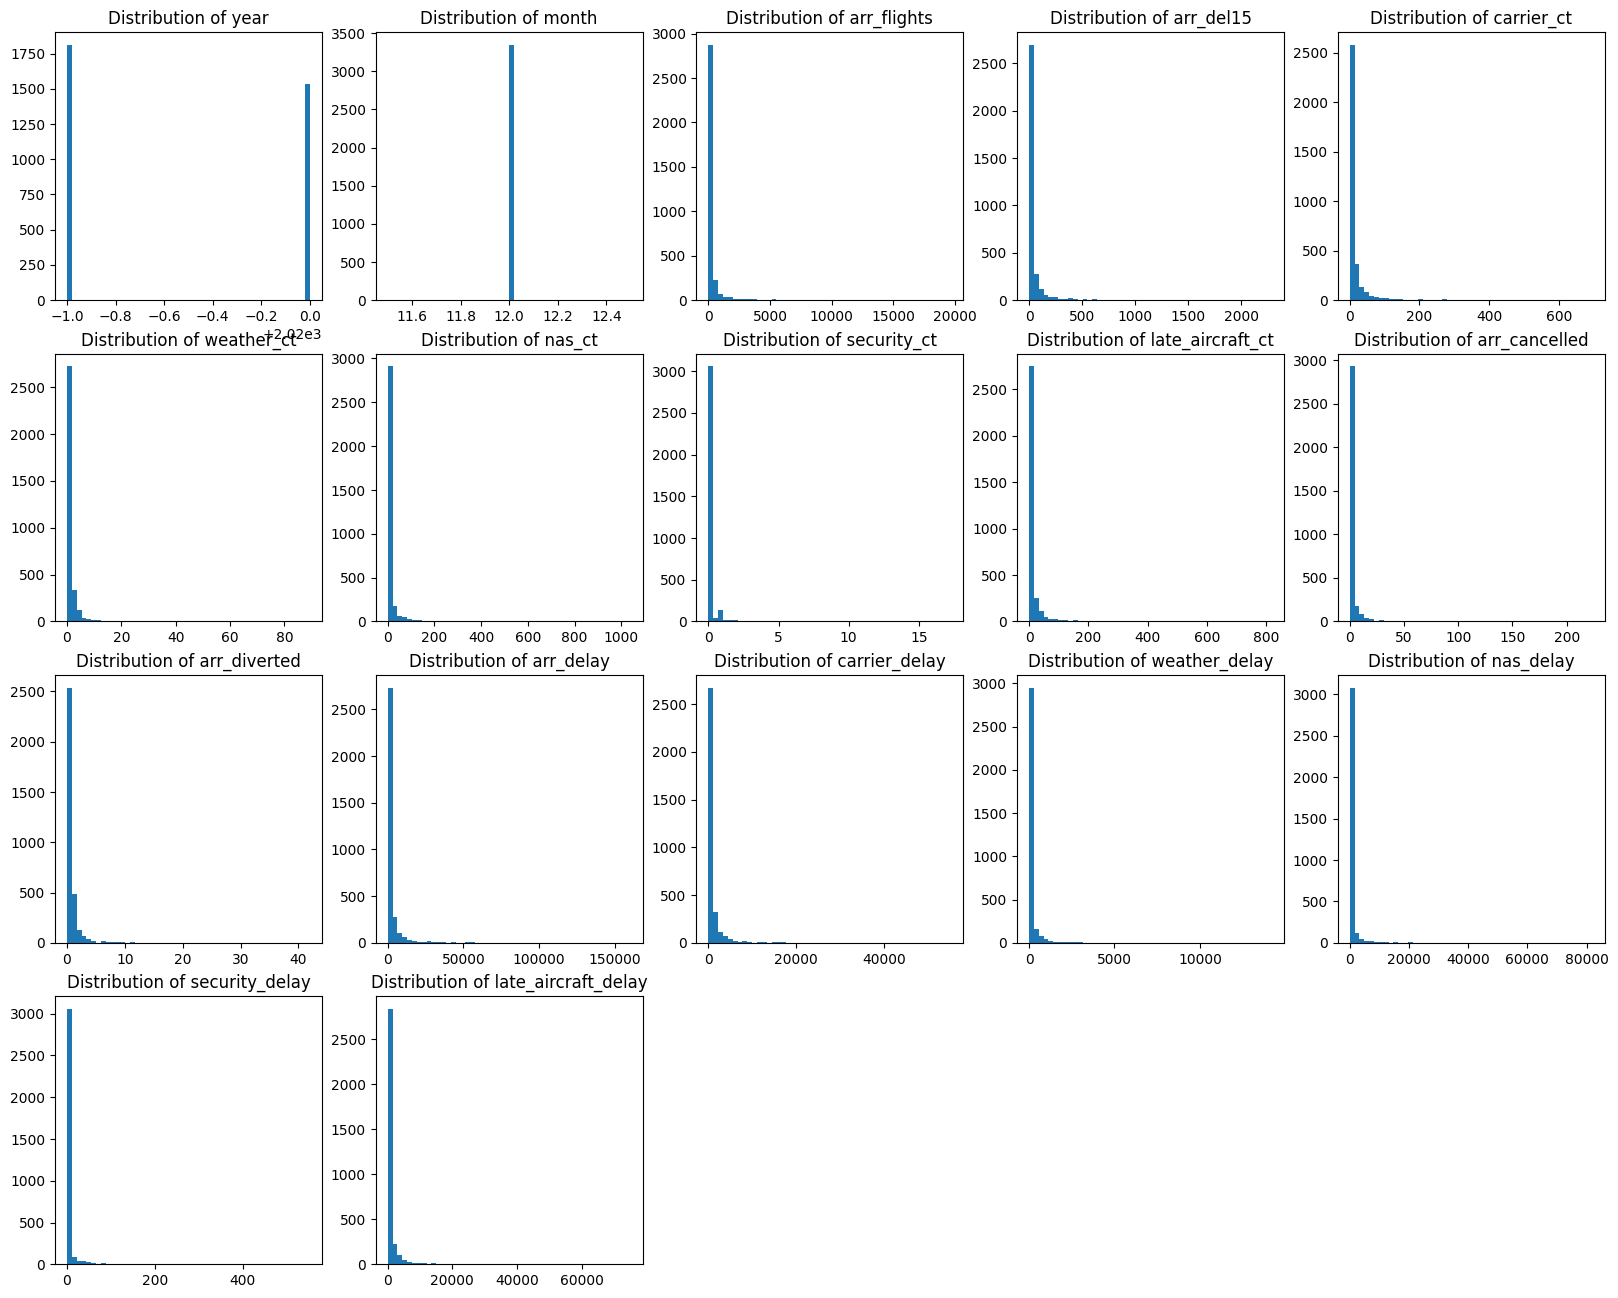

In [23]:
plt.figure(figsize=(20, 16))

for i, col in enumerate(col_numeric):
    plt.subplot(4, 5, i+1)
    plt.hist(df[col], bins=50)
    plt.title(f"Distribution of {col}")
plt.show()

### Observation 2:

- for these numeric features, most cases have smaller values, some have extreme large values

- The majority of flights has low delay numbers and delay times, but there are extreme cases

## 2.1 Boxplot

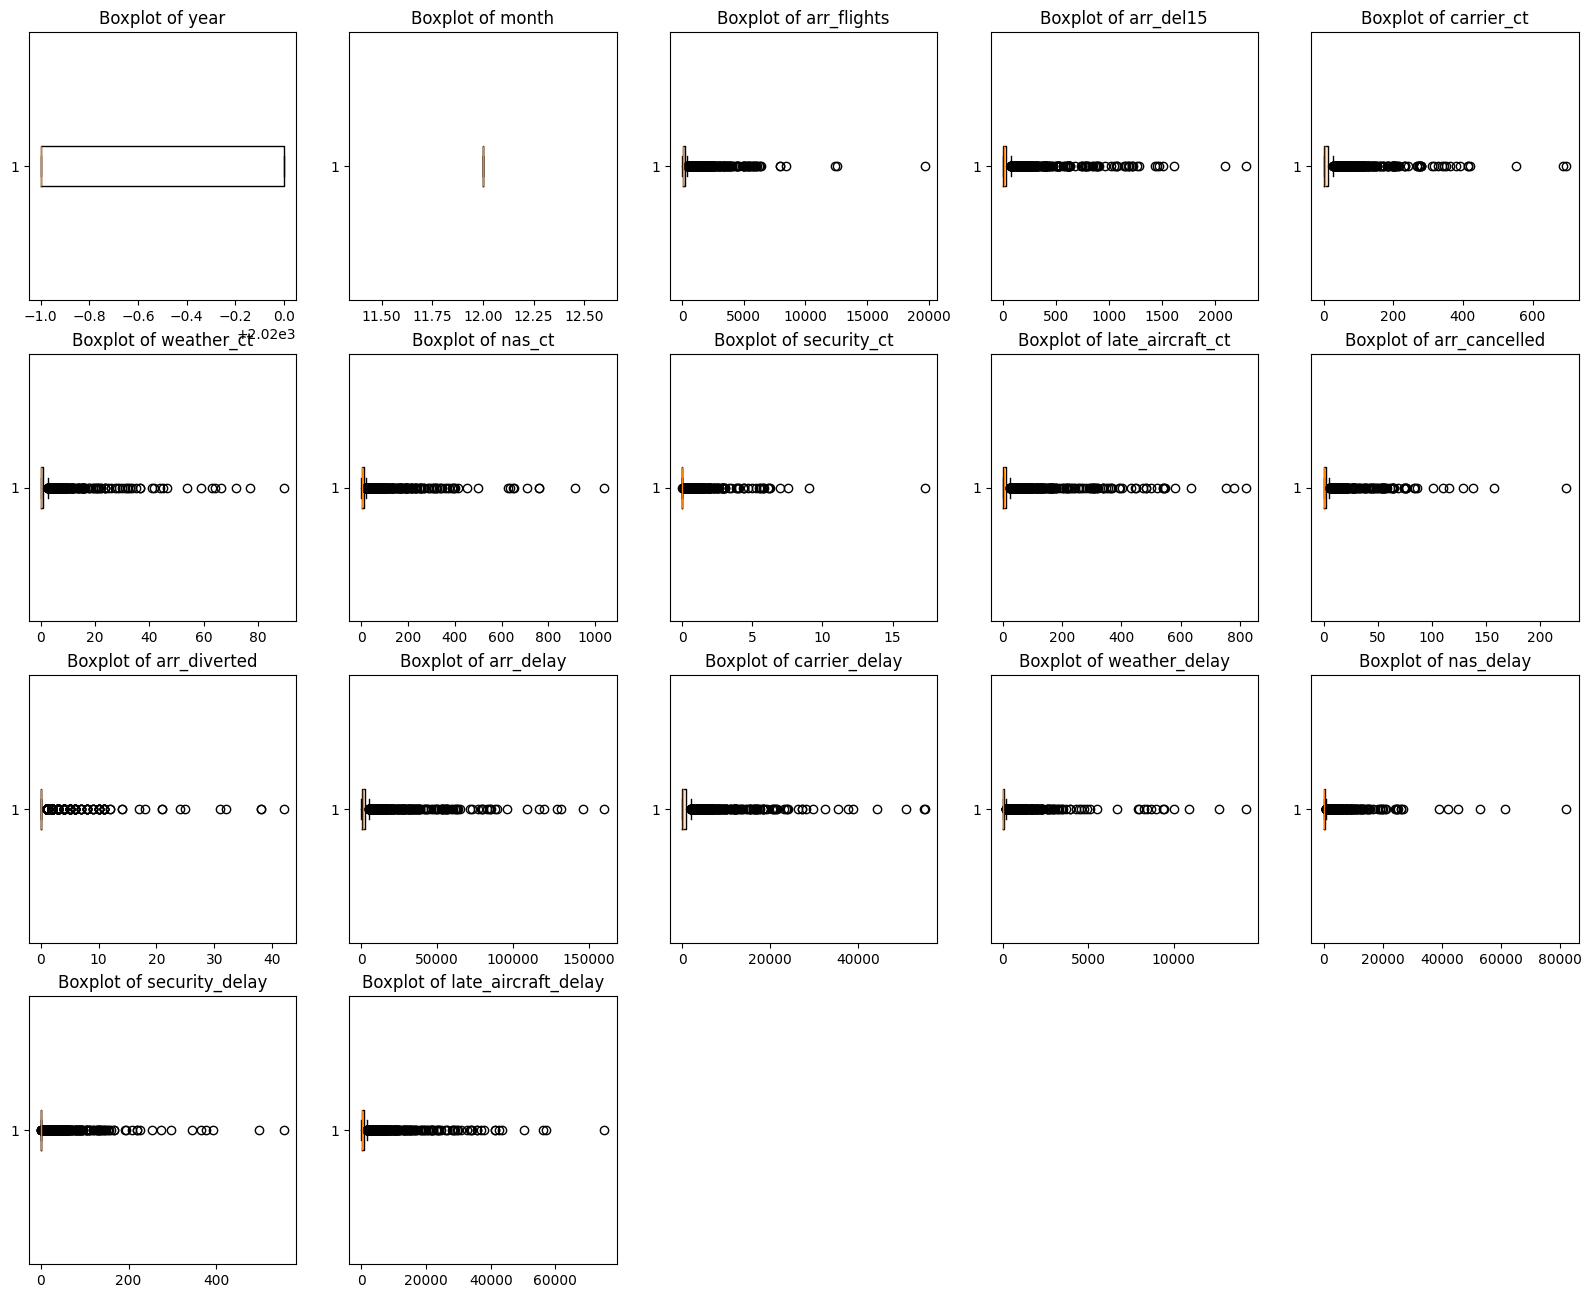

In [17]:
plt.figure(figsize=(20, 16))

for i, col in enumerate(col_numeric):
    plt.subplot(4, 5, i+1)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
plt.show()

## 2.3 Check Correlations

In [29]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'sum_delay_reasons'],
      dtype='object')

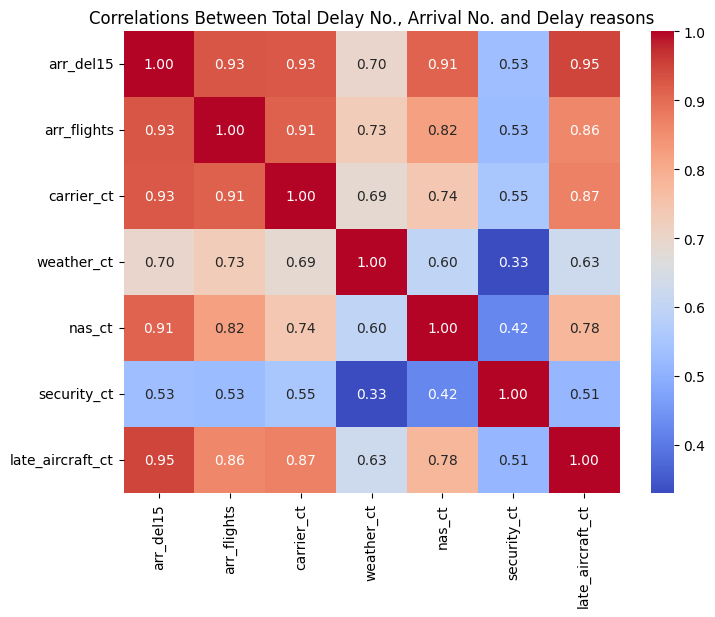

In [33]:
col_select = ['arr_del15', 'arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct']

df_corr = df[col_select]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlations Between Total Delay No., Arrival No. and Delay reasons")
plt.show()

### Observation 3:

- Delay No. is highly correlated with Total No. of arrival flights; in general, more arrival flights lead to more delay flights
- For Delay reasons, carrier_ct, nas_ct, and late_aircraft would be the main reasons;
- Weather would be the moderate effect on delay
- security is the least influence on the delay, and it is not correlated with others, it might be more random or situational factor.

In [34]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'sum_delay_reasons'],
      dtype='object')

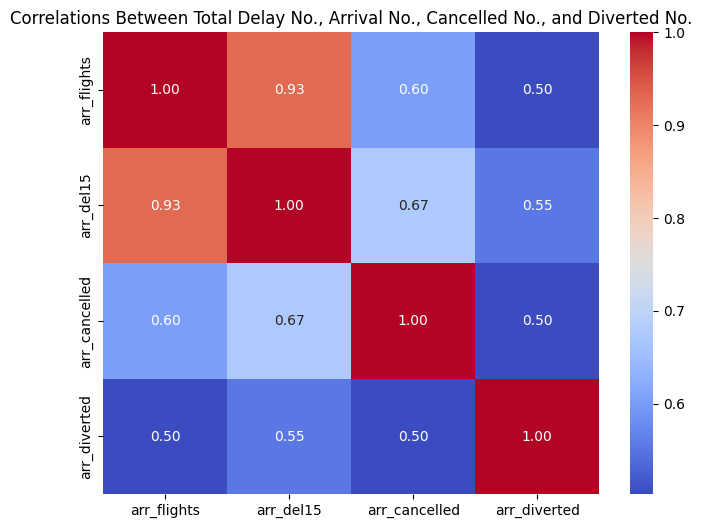

In [41]:
col_select = ['arr_flights', 'arr_del15','arr_cancelled', 'arr_diverted']

df_corr = df[col_select]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlations Between Total Delay No., Arrival No., Cancelled No., and Diverted No.")
plt.show()

In [36]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'sum_delay_reasons'],
      dtype='object')

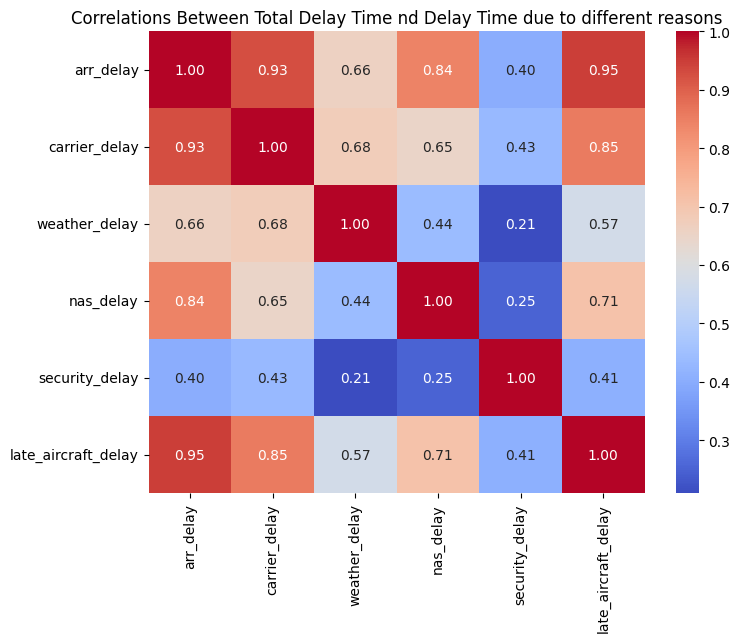

In [42]:
# then check the correlations between total delay time and delay time due to different reasons
col_select = ['arr_delay',  'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']

df_corr = df[col_select]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlations Between Total Delay Time nd Delay Time due to different reasons")
plt.show()

### Observation 4:

- Total Delay Time is hight correlated with late_aircraft delay time, carrier delay time, and nas delay time;
- This means late_aircraft, carrier, and nas are key driver for delay time;
- Weather and security are less associated with total other types, they might be more random factors or situational factors.

# **3. Seperate data into different groups**

In [44]:
df = df.drop(columns = 'sum_delay_reasons')
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,0.80,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,5.12,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.00,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.00,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0


In [45]:
# divide into year 2019 and 2020

df_2019 = df[df.year == 2019]

df_2020 = df[df.year == 2020]

df_2019.shape, df_2020.shape

((1811, 21), (1532, 21))

In [46]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [50]:
# group by carriers

df_2019_carriers = df_2019.groupby(["carrier", "carrier_name"])[[ 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']].sum()

df_2019_carriers

,,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier,carrier_name,,,,,,,,,,,,,,,
9E,Endeavor Air Inc.,23365.0,3965.0,946.29,139.99,1278.19,1.45,1599.17,246.0,57.0,305080.0,81530.0,22658.0,73966.0,150.0,126776.0
AA,American Airlines Inc.,79405.0,14617.0,4510.56,296.89,4924.37,36.08,4848.98,177.0,134.0,906494.0,321322.0,23198.0,203348.0,1361.0,357265.0
AS,Alaska Airlines Inc.,21993.0,5469.0,1347.44,58.86,2225.01,23.97,1813.73,241.0,51.0,313653.0,87950.0,3785.0,96684.0,896.0,124338.0
B6,JetBlue Airways,25217.0,8131.0,2746.45,70.54,2422.77,10.58,2880.69,183.0,71.0,723298.0,238720.0,12637.0,158828.0,456.0,312657.0
DL,Delta Air Lines Inc.,81524.0,12444.0,3825.61,460.67,4671.65,8.35,3477.60,26.0,93.0,734728.0,257675.0,43330.0,217742.0,436.0,215545.0
EV,ExpressJet Airlines LLC,11203.0,2694.0,640.84,59.48,1090.03,0.00,903.68,233.0,39.0,254148.0,79871.0,8325.0,87490.0,0.0,78462.0
F9,Frontier Airlines Inc.,12267.0,2882.0,899.14,23.88,910.20,0.00,1048.83,139.0,13.0,193371.0,57460.0,1633.0,44321.0,0.0,89957.0
G4,Allegiant Air,9381.0,2395.0,532.30,136.57,684.02,22.17,1019.96,70.0,15.0,160333.0,51789.0,12268.0,27541.0,804.0,67931.0
HA,Hawaiian Airlines Inc.,7276.0,813.0,557.16,15.43,15.24,4.61,220.56,8.0,1.0,28379.0,20721.0,452.0,369.0,159.0,6678.0


In [51]:
df_2019_carriers = df_2019_carriers.reset_index()

df_2019_carriers

,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,9E,Endeavor Air Inc.,23365.0,3965.0,946.29,139.99,1278.19,1.45,1599.17,246.0,57.0,305080.0,81530.0,22658.0,73966.0,150.0,126776.0
1,AA,American Airlines Inc.,79405.0,14617.0,4510.56,296.89,4924.37,36.08,4848.98,177.0,134.0,906494.0,321322.0,23198.0,203348.0,1361.0,357265.0
2,AS,Alaska Airlines Inc.,21993.0,5469.0,1347.44,58.86,2225.01,23.97,1813.73,241.0,51.0,313653.0,87950.0,3785.0,96684.0,896.0,124338.0
3,B6,JetBlue Airways,25217.0,8131.0,2746.45,70.54,2422.77,10.58,2880.69,183.0,71.0,723298.0,238720.0,12637.0,158828.0,456.0,312657.0
4,DL,Delta Air Lines Inc.,81524.0,12444.0,3825.61,460.67,4671.65,8.35,3477.60,26.0,93.0,734728.0,257675.0,43330.0,217742.0,436.0,215545.0
5,EV,ExpressJet Airlines LLC,11203.0,2694.0,640.84,59.48,1090.03,0.00,903.68,233.0,39.0,254148.0,79871.0,8325.0,87490.0,0.0,78462.0
6,F9,Frontier Airlines Inc.,12267.0,2882.0,899.14,23.88,910.20,0.00,1048.83,139.0,13.0,193371.0,57460.0,1633.0,44321.0,0.0,89957.0
7,G4,Allegiant Air,9381.0,2395.0,532.30,136.57,684.02,22.17,1019.96,70.0,15.0,160333.0,51789.0,12268.0,27541.0,804.0,67931.0
8,HA,Hawaiian Airlines Inc.,7276.0,813.0,557.16,15.43,15.24,4.61,220.56,8.0,1.0,28379.0,20721.0,452.0,369.0,159.0,6678.0
9,MQ,Envoy Air,27100.0,5528.0,1125.09,334.85,1688.88,8.50,2370.64,379.0,88.0,368659.0,79169.0,39127.0,74871.0,286.0,175206.0


In [52]:

df_2020_carriers = df_2020.groupby(["carrier", "carrier_name"])[[ 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']].sum().reset_index()

df_2020_carriers

,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,9E,Endeavor Air Inc.,22010.0,1895.0,675.10,55.02,714.73,3.47,446.66,166.0,26.0,126603.0,61305.0,10256.0,24968.0,98.0,29976.0
1,AA,American Airlines Inc.,38496.0,4327.0,1693.30,93.94,1809.43,14.96,715.40,210.0,55.0,278851.0,127147.0,16071.0,68509.0,560.0,66564.0
2,AS,Alaska Airlines Inc.,11008.0,825.0,227.53,58.20,355.89,22.08,161.32,164.0,39.0,37382.0,12576.0,3871.0,10996.0,891.0,9048.0
3,B6,JetBlue Airways,10964.0,2232.0,841.00,50.31,872.35,8.90,459.44,129.0,19.0,141492.0,58719.0,7658.0,33958.0,391.0,40766.0
4,DL,Delta Air Lines Inc.,49378.0,6419.0,2159.40,109.81,3271.83,14.07,863.85,566.0,49.0,342701.0,166322.0,18908.0,101411.0,714.0,55346.0
5,F9,Frontier Airlines Inc.,7320.0,772.0,211.25,14.97,387.27,0.00,158.53,36.0,1.0,39325.0,13118.0,1111.0,15496.0,0.0,9600.0
6,G4,Allegiant Air,7368.0,1085.0,305.28,48.54,348.97,1.23,381.03,152.0,20.0,80381.0,27609.0,3952.0,21019.0,79.0,27722.0
7,HA,Hawaiian Airlines Inc.,3139.0,219.0,182.23,4.34,1.54,0.00,30.87,56.0,4.0,10864.0,8282.0,1504.0,43.0,0.0,1035.0
8,MQ,Envoy Air,16814.0,2542.0,522.63,122.74,1350.47,10.72,535.49,182.0,30.0,136506.0,32513.0,14060.0,50354.0,360.0,39219.0
9,NK,Spirit Air Lines,12745.0,1896.0,441.37,36.67,1036.22,29.36,352.38,136.0,21.0,100071.0,23750.0,3652.0,47981.0,824.0,23864.0


In [53]:
df_2019.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [54]:
# Groupby Airports

df_2019_airports = df_2019.groupby(['airport', 'airport_name'])[[ 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']].sum().reset_index()

df_2019_airports

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",356.0,60.0,22.68,3.82,13.38,0.00,20.13,2.0,1.0,3464.0,1559.0,162.0,497.0,0.0,1246.0
1,ABI,"Abilene, TX: Abilene Regional",195.0,32.0,11.58,0.60,8.79,0.00,11.02,1.0,0.0,1563.0,459.0,21.0,257.0,0.0,826.0
2,ABQ,"Albuquerque, NM: Albuquerque International Sun...",2051.0,438.0,164.31,8.41,56.22,0.31,208.76,11.0,2.0,22646.0,9254.0,350.0,1889.0,17.0,11136.0
3,ABR,"Aberdeen, SD: Aberdeen Regional",64.0,15.0,2.94,3.41,4.45,0.00,4.19,2.0,1.0,2466.0,153.0,502.0,265.0,0.0,1546.0
4,ABY,"Albany, GA: Southwest Georgia Regional",81.0,11.0,5.91,1.00,0.71,0.00,3.38,0.0,0.0,1244.0,890.0,43.0,39.0,0.0,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,WRG,"Wrangell, AK: Wrangell Airport",60.0,16.0,4.53,0.60,5.63,0.00,5.24,1.0,1.0,646.0,181.0,9.0,154.0,0.0,302.0
346,XNA,"Fayetteville, AR: Northwest Arkansas Regional",1137.0,206.0,58.37,7.58,57.31,0.00,82.75,8.0,7.0,13312.0,4149.0,1070.0,2378.0,0.0,5715.0
347,XWA,"Williston, ND: Williston Basin International",79.0,17.0,5.76,0.35,2.76,0.79,7.35,1.0,5.0,1701.0,519.0,37.0,98.0,15.0,1032.0
348,YAK,"Yakutat, AK: Yakutat Airport",60.0,12.0,1.00,0.89,1.58,0.00,8.52,2.0,1.0,767.0,28.0,51.0,55.0,0.0,633.0


In [55]:
df_2020_airports = df_2020.groupby(['airport', 'airport_name'])[[ 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']].sum().reset_index()

df_2020_airports

,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",309.0,39.0,21.53,0.72,8.19,0.0,8.56,7.0,4.0,2443.0,1396.0,18.0,782.0,0.0,247.0
1,ABI,"Abilene, TX: Abilene Regional",194.0,12.0,3.80,0.06,3.72,0.0,4.41,7.0,0.0,1578.0,236.0,2.0,1074.0,0.0,266.0
2,ABQ,"Albuquerque, NM: Albuquerque International Sun...",993.0,114.0,58.90,5.07,16.25,1.0,32.79,27.0,1.0,7166.0,3977.0,1043.0,585.0,23.0,1538.0
3,ABR,"Aberdeen, SD: Aberdeen Regional",62.0,7.0,6.00,1.00,0.00,0.0,0.00,2.0,2.0,602.0,494.0,108.0,0.0,0.0,0.0
4,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,0.04,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,WRG,"Wrangell, AK: Wrangell Airport",60.0,11.0,0.29,1.00,2.90,0.0,6.81,5.0,1.0,355.0,15.0,16.0,75.0,0.0,249.0
345,XNA,"Fayetteville, AR: Northwest Arkansas Regional",521.0,57.0,24.33,3.88,14.38,0.0,14.42,6.0,6.0,2872.0,925.0,141.0,1290.0,0.0,516.0
346,XWA,"Williston, ND: Williston Basin International",57.0,7.0,5.00,0.00,0.00,0.0,2.00,0.0,0.0,316.0,237.0,0.0,0.0,0.0,79.0
347,YAK,"Yakutat, AK: Yakutat Airport",60.0,9.0,0.99,0.00,5.51,0.0,2.50,5.0,6.0,373.0,32.0,0.0,150.0,0.0,191.0


Now, save the seperated dataframes

In [56]:
df_2019_carriers.to_csv("2019_carrier_data.csv")
df_2020_carriers.to_csv("2020_carrier_data.csv")
df_2019_airports.to_csv("2019_airport_data.csv")
df_2020_airports.to_csv("2020_airport_data.csv")